In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.stats import norm
import statsmodels.api as sm
from scipy import stats

In [2]:
df = pd.read_csv("Measurements.csv")

In [3]:
display(df.shape)
display(df.dtypes)

(55, 4)

time        float64
distance    float64
material     object
density     float64
dtype: object

In [22]:
df['speed'] = df['distance'] / df['time']

# Create dataframe with averaged data for speed and distance
averaged_df = df.groupby(['material', 'distance'])['time', 'speed', 'density'].mean().reset_index()

# Create dataframe with data by material
averaged_material_df = df.groupby(['material'])['speed', 'density'].mean().reset_index()

#Create a list with the unique materials.
materials = df['material'].unique()

# Set the Seaborn style to "darkgrid"
sns.set(style="darkgrid")

C:\Users\lukas\AppData\Local\Temp\ipykernel_22860\2063562655.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  averaged_df = df.groupby(['material', 'distance'])['time', 'speed', 'density'].mean().reset_index()
C:\Users\lukas\AppData\Local\Temp\ipykernel_22860\2063562655.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  averaged_material_df = df.groupby(['material'])['speed', 'density'].mean().reset_index()


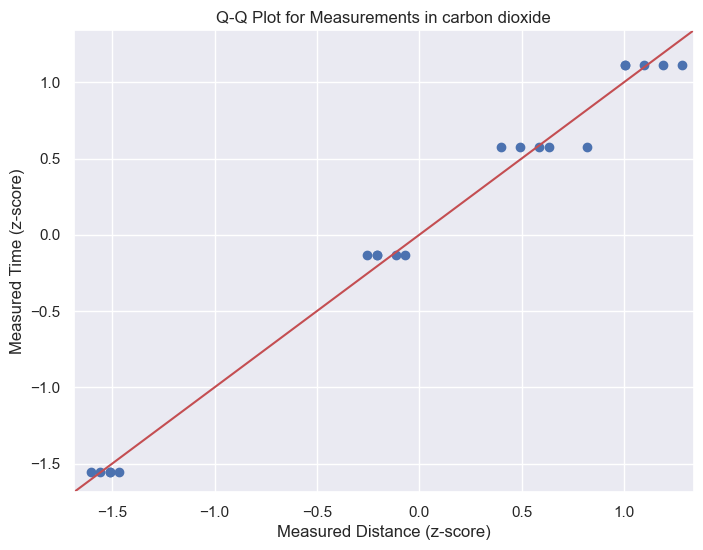

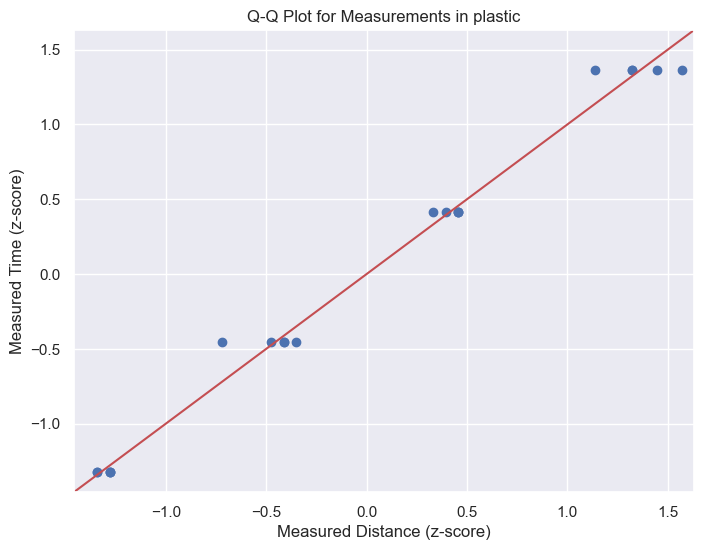

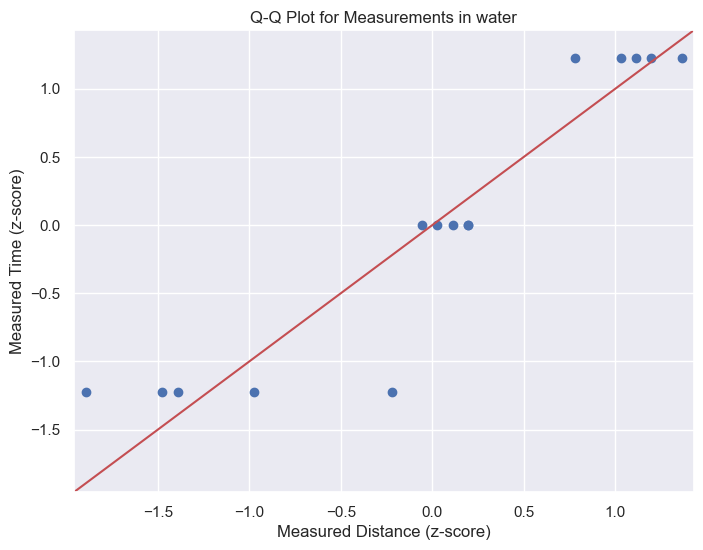

In [16]:
# Create separate Q-Q plots for each material
for material in materials:
    # Filter the data for the current material
    material_data = df[df['material'] == material]

    # Extract time and distance data
    time_data = material_data['time'].values
    distance_data = material_data['distance'].values

    # Create a Q-Q plot
    fig, ax = plt.subplots(figsize=(8, 6))
    sm.qqplot_2samples(stats.zscore(time_data), stats.zscore(distance_data), ax=ax, line='45')
    ax.set_xlabel('Measured Distance (z-score)')
    ax.set_ylabel('Measured Time (z-score)')
    ax.set_title(f'Q-Q Plot for Measurements in {material}')
    plt.grid(True)
    plt.show()

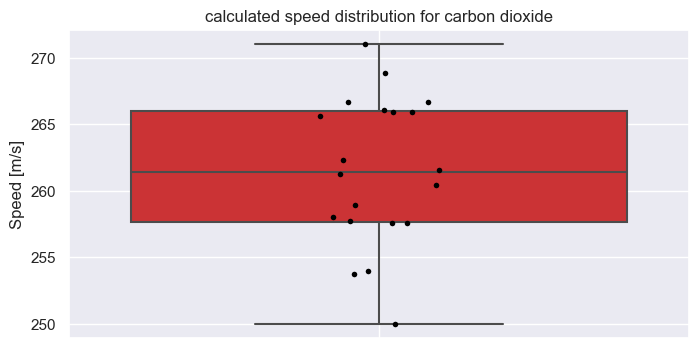

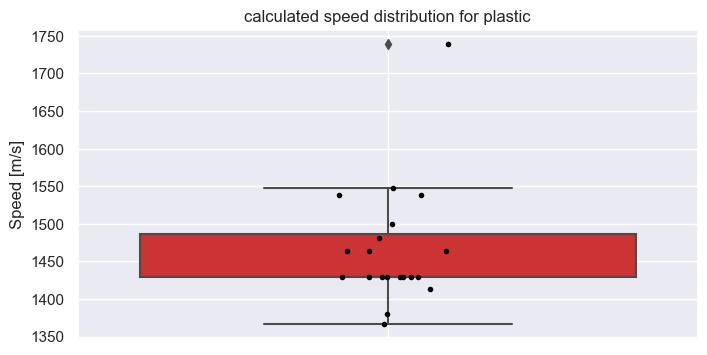

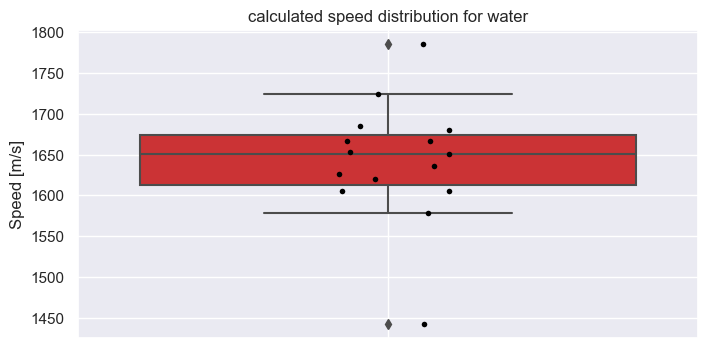

In [19]:
# Get unique material values
materials = df['material'].unique()

# Create three separate plots for each material
for material in materials:
    material_df = df[df['material'] == material]
    
    plt.figure(figsize=(8, 4))  # Adjust the figure size as needed
    
    # Create a boxplot for the material
    sns.boxplot(data=material_df, y='speed', palette='Set1')
    
    # Add individual measurements as crosses (or points)
    sns.stripplot(data=material_df, y='speed', jitter=True, color='black', size=4)
    
    # Set labels and title
    plt.ylabel('Speed [m/s]')
    plt.title(f'calculated speed distribution for {material}')
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    
    # Show the plot
    plt.grid(True)
    plt.show()


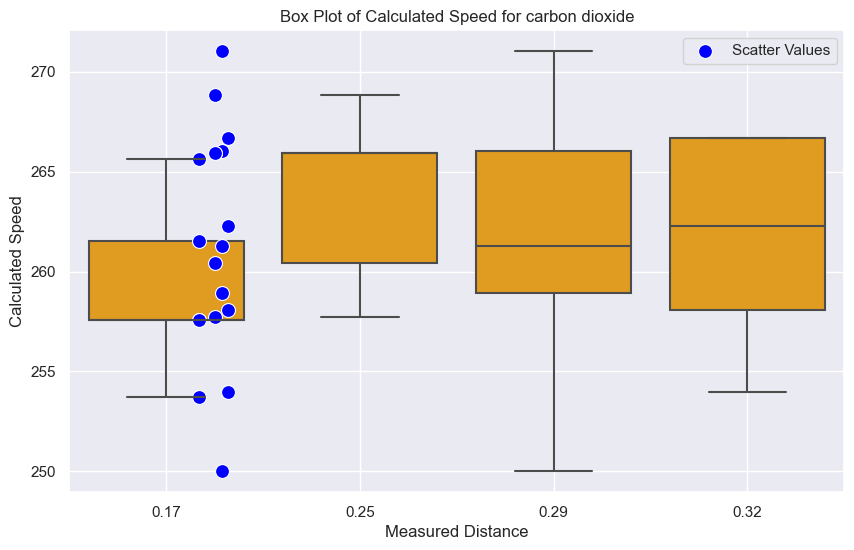

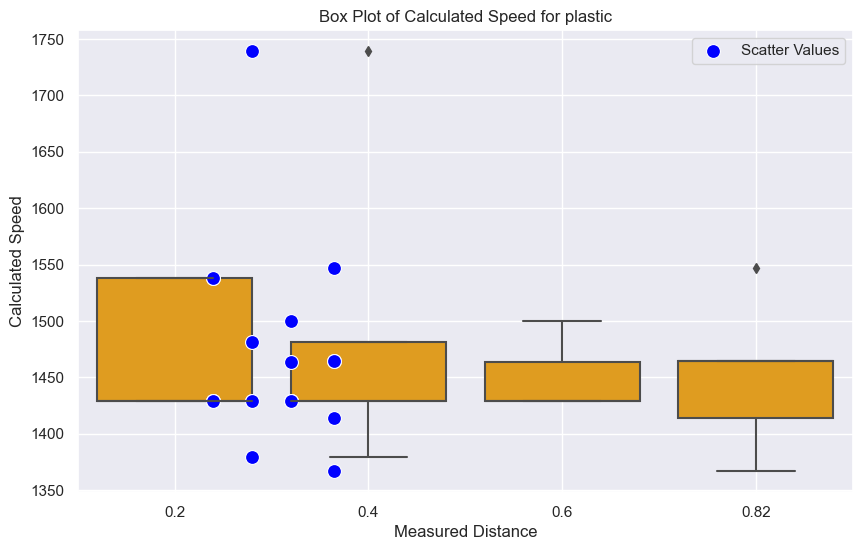

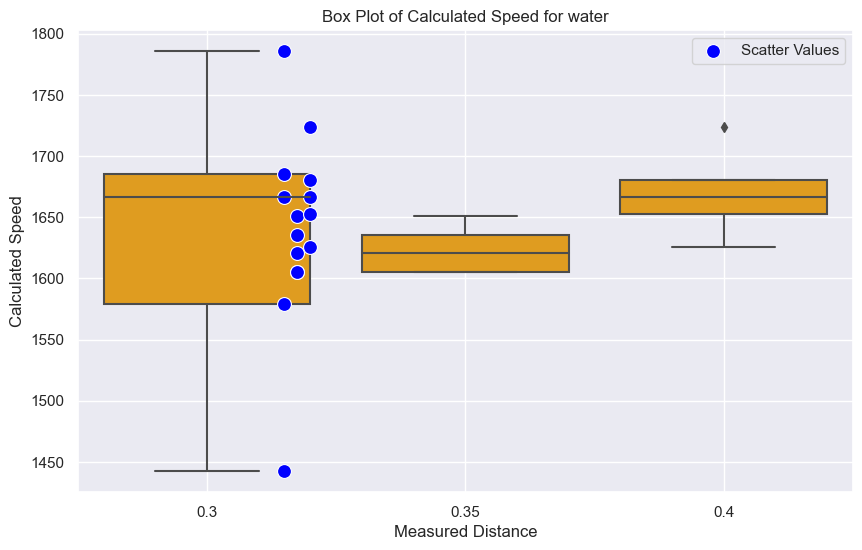

In [28]:
for material in materials:
    material_data = df[df['material'] == material]

    pd.to_numeric(material_data['distance'])
    plt.figure(figsize=(10, 6))
    
    # Create a box plot
    sns.boxplot(data=material_data, x='distance', y='speed', color='orange')
    plt.xlabel('Measured Distance')
    plt.ylabel('Calculated Speed')
    plt.title(f'Box Plot of Calculated Speed for {material}')
    
    # Overlay a scatterplot with datapoints matching distances
    sns.scatterplot(data=material_data, x='distance', y='speed', color='blue', marker='o', s=100, label='Scatter Values')

    plt.legend()
    plt.grid(True)
    plt.show()

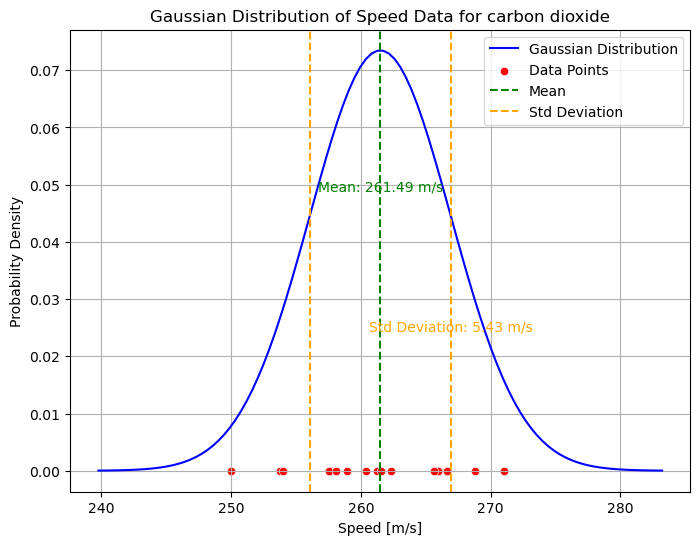

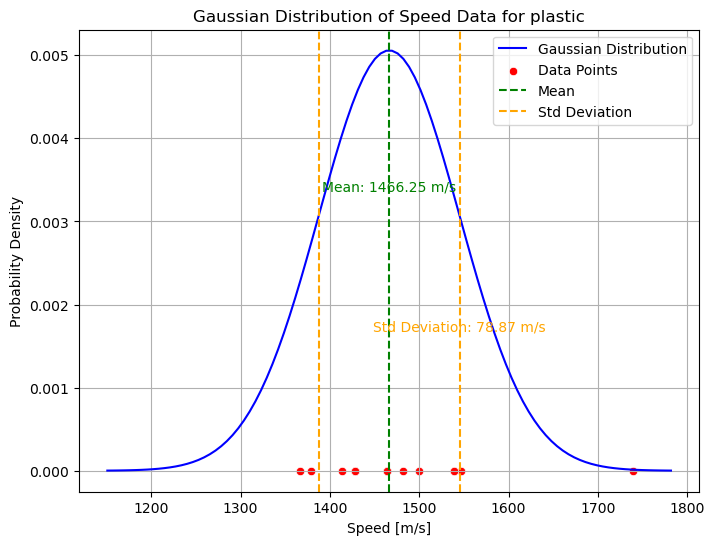

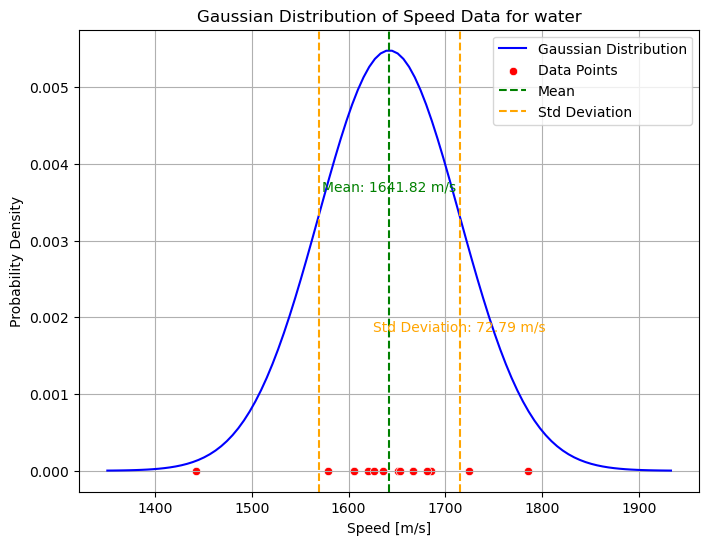

In [10]:
# Create three separate plots for each material
for material in materials:
    material_df = df[df['material'] == material]

    # Extract speed data in microseconds
    speed_data = material_df['speed'].values

    # Calculate the mean and standard deviation of the speed data
    mean_speed = speed_data.mean()
    std_deviation_speed = speed_data.std(ddof=0)

    # Create a range of x values for the curve
    x = np.linspace(mean_speed - 4 * std_deviation_speed, mean_speed + 4 *std_deviation_speed, 100)

    # Create a Gaussian distribution (normal distribution) using the mean and standard deviation
    gaussian = norm.pdf(x, loc=mean_speed, scale=std_deviation_speed)
    
    # Plot the Gaussian distribution using Seaborn
    plt.figure(figsize=(8, 6))
    sns.lineplot(x=x, y=gaussian, label='Gaussian Distribution', color='blue')

    # Add data points as a scatterplot
    sns.scatterplot(x=speed_data, y=0, label='Data Points', color='red', marker='o')  

    # Plot vertical lines for mean and standard deviation
    plt.axvline(mean_speed, color='green', linestyle='--', label='Mean')
    plt.axvline(mean_speed - std_deviation_speed, color='orange', linestyle='--', label='Std Deviation')
    plt.axvline(mean_speed + std_deviation_speed, color='orange', linestyle='--')

    # Add annotations for mean and standard deviation values
    upper_half = 2/3 * max(gaussian)
    lower_half = 1/3 * max(gaussian)
    plt.annotate(f'Mean: {mean_speed:.2f} m/s', xy=(mean_speed, upper_half), color='green', ha='center')
    plt.annotate(f'Std Deviation: {std_deviation_speed:.2f} m/s', xy=(mean_speed+std_deviation_speed, lower_half), color='orange', ha='center')

    plt.xlabel('Speed [m/s]')
    plt.ylabel('Probability Density')
    plt.title(f'Gaussian Distribution of Speed Data for {material}')
    plt.legend()
    plt.grid(True)
    plt.show()

C:\Users\lukas\AppData\Local\Temp\ipykernel_22860\28200719.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  averaged_material_df = df.groupby(['material'])['speed', 'density'].mean().reset_index()


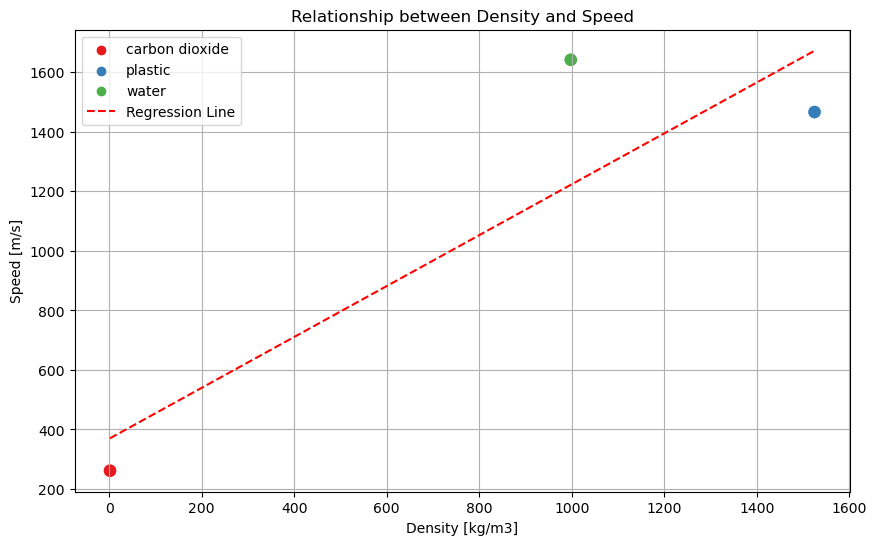

Regression Coefficients: Intercept = 368.9498167237365, Slope = 0.8547901337858723


In [11]:
# Create a scatterplot with regression line
plt.figure(figsize=(10, 6))

sns.scatterplot(data=averaged_material_df, x='density', y='speed', hue='material', palette='Set1', s=100)
plt.xlabel('Density [kg/m3]')
plt.ylabel('Speed [m/s]')
plt.title('Relationship between Density and Speed')

# Fit a linear regression model to the data points
X = df['density'].values.reshape(-1, 1)
y = df['speed'].values

regressor = LinearRegression()
regressor.fit(X, y)

# Plot the regression line
x_values = np.linspace(df['density'].min(), df['density'].max(), 100)
y_values = regressor.predict(x_values.reshape(-1, 1))
plt.plot(x_values, y_values, linestyle='--', color='red', label='Regression Line')

# Show legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

# Print regression coefficients
print(f'Regression Coefficients: Intercept = {regressor.intercept_}, Slope = {regressor.coef_[0]}')